# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [1]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [2]:
#import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

import keras
import sklearn
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


In [3]:
# Import essential libraries
import zipfile
import os
from PIL import Image



Load the dataset.

In [4]:
# Load and unzip the dataset from the zip file data.zip in the current directory

#Check if the data directory exists
if not os.path.exists('data'):
    #If not, unzip the data.zip file
    with zipfile.ZipFile('data.zip', 'r') as zip_ref:
        zip_ref.extractall()

## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [5]:
#Extrcted Data folder contains 7 subfolders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
# Create a function to load the raw images
def load_images(data_dir='data'):
    """
    Load images from the dataset directory
    Input:
        data_dir: Path to the data directory containing class subfolders
    Returns:
        images: List of loaded and preprocessed images
        labels: List of corresponding labels
    """
    
    images = []
    #label them based on the folder name    
    labels = []
    
    # List all class directories
    class_dirs = sorted(os.listdir(data_dir))
    # Remove any hidden files/directories (like .DS_Store)
    class_dirs = [d for d in class_dirs if not d.startswith('.')]
    
    # Load images from each class directory
    for class_name in class_dirs:
        class_path = os.path.join(data_dir, class_name)
        # Skip if not a directory
        if not os.path.isdir(class_path):
            continue
        # Process all images in the class directory
        for img_name in os.listdir(class_path):
            if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(class_path, img_name)
                try:
                    # Load and convert image to RGB
                    img = Image.open(img_path).convert('RGB')
                    # Convert to numpy array and normalize
                    img_array = np.array(img) / 255.0
                    images.append(img_array)
                    labels.append(class_name) # Using folder name as label
                except Exception as e:
                    print(f"Error loading {img_path}: {e}")
    
    return np.array(images), np.array(labels)

#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

Loaded 7625 images with 7 classes
Classes: ['Cardboard' 'Food_Waste' 'Glass' 'Metal' 'Other' 'Paper' 'Plastic']


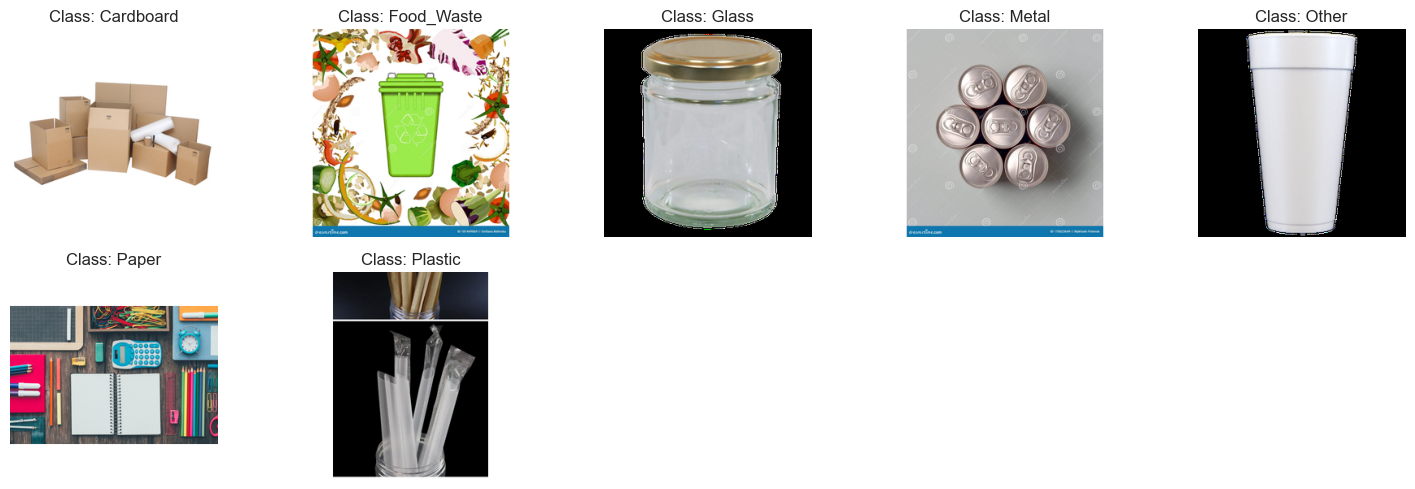

In [6]:
# Get the images and their labels
images, labels = load_images()

# Get unique classes
unique_classes = np.unique(labels)
print(f"Loaded {len(images)} images with {len(unique_classes)} classes")
print(f"Classes: {unique_classes}")

# Visualize one image from each class
plt.figure(figsize=(15, 5))
for i, class_name in enumerate(unique_classes):
    plt.subplot(2, 5, i + 1)
    # Get first image of current class
    class_images = images[labels == class_name]
    plt.imshow(class_images[0])
    plt.title(f"Class: {class_name}")
    plt.axis('off')

plt.tight_layout()
plt.show()

Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

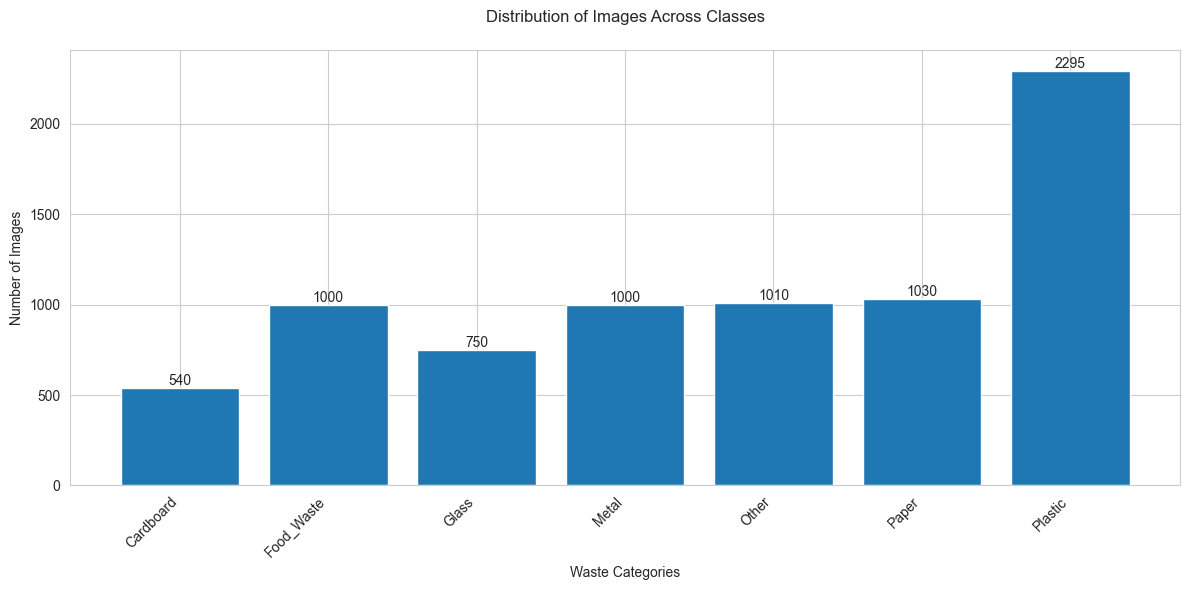

In [7]:
# Visualise Data Distribution
def plot_class_distribution(labels):
    """
    Create a bar plot showing the distribution of classes in the dataset
    Input: labels: Array of labels from the dataset
    """

    # Count samples in each class
    unique_classes, counts = np.unique(labels, return_counts=True)

    # Create bar plot
    plt.figure(figsize=(12, 6))
    bars = plt.bar(unique_classes, counts)
    
    # Customize the plot
    plt.title('Distribution of Images Across Classes', fontsize=12, pad=20)
    plt.xlabel('Waste Categories', fontsize=10)
    plt.ylabel('Number of Images', fontsize=10)
    plt.xticks(rotation=45, ha='right')
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom')
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    plt.show()

plot_class_distribution(labels)



#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

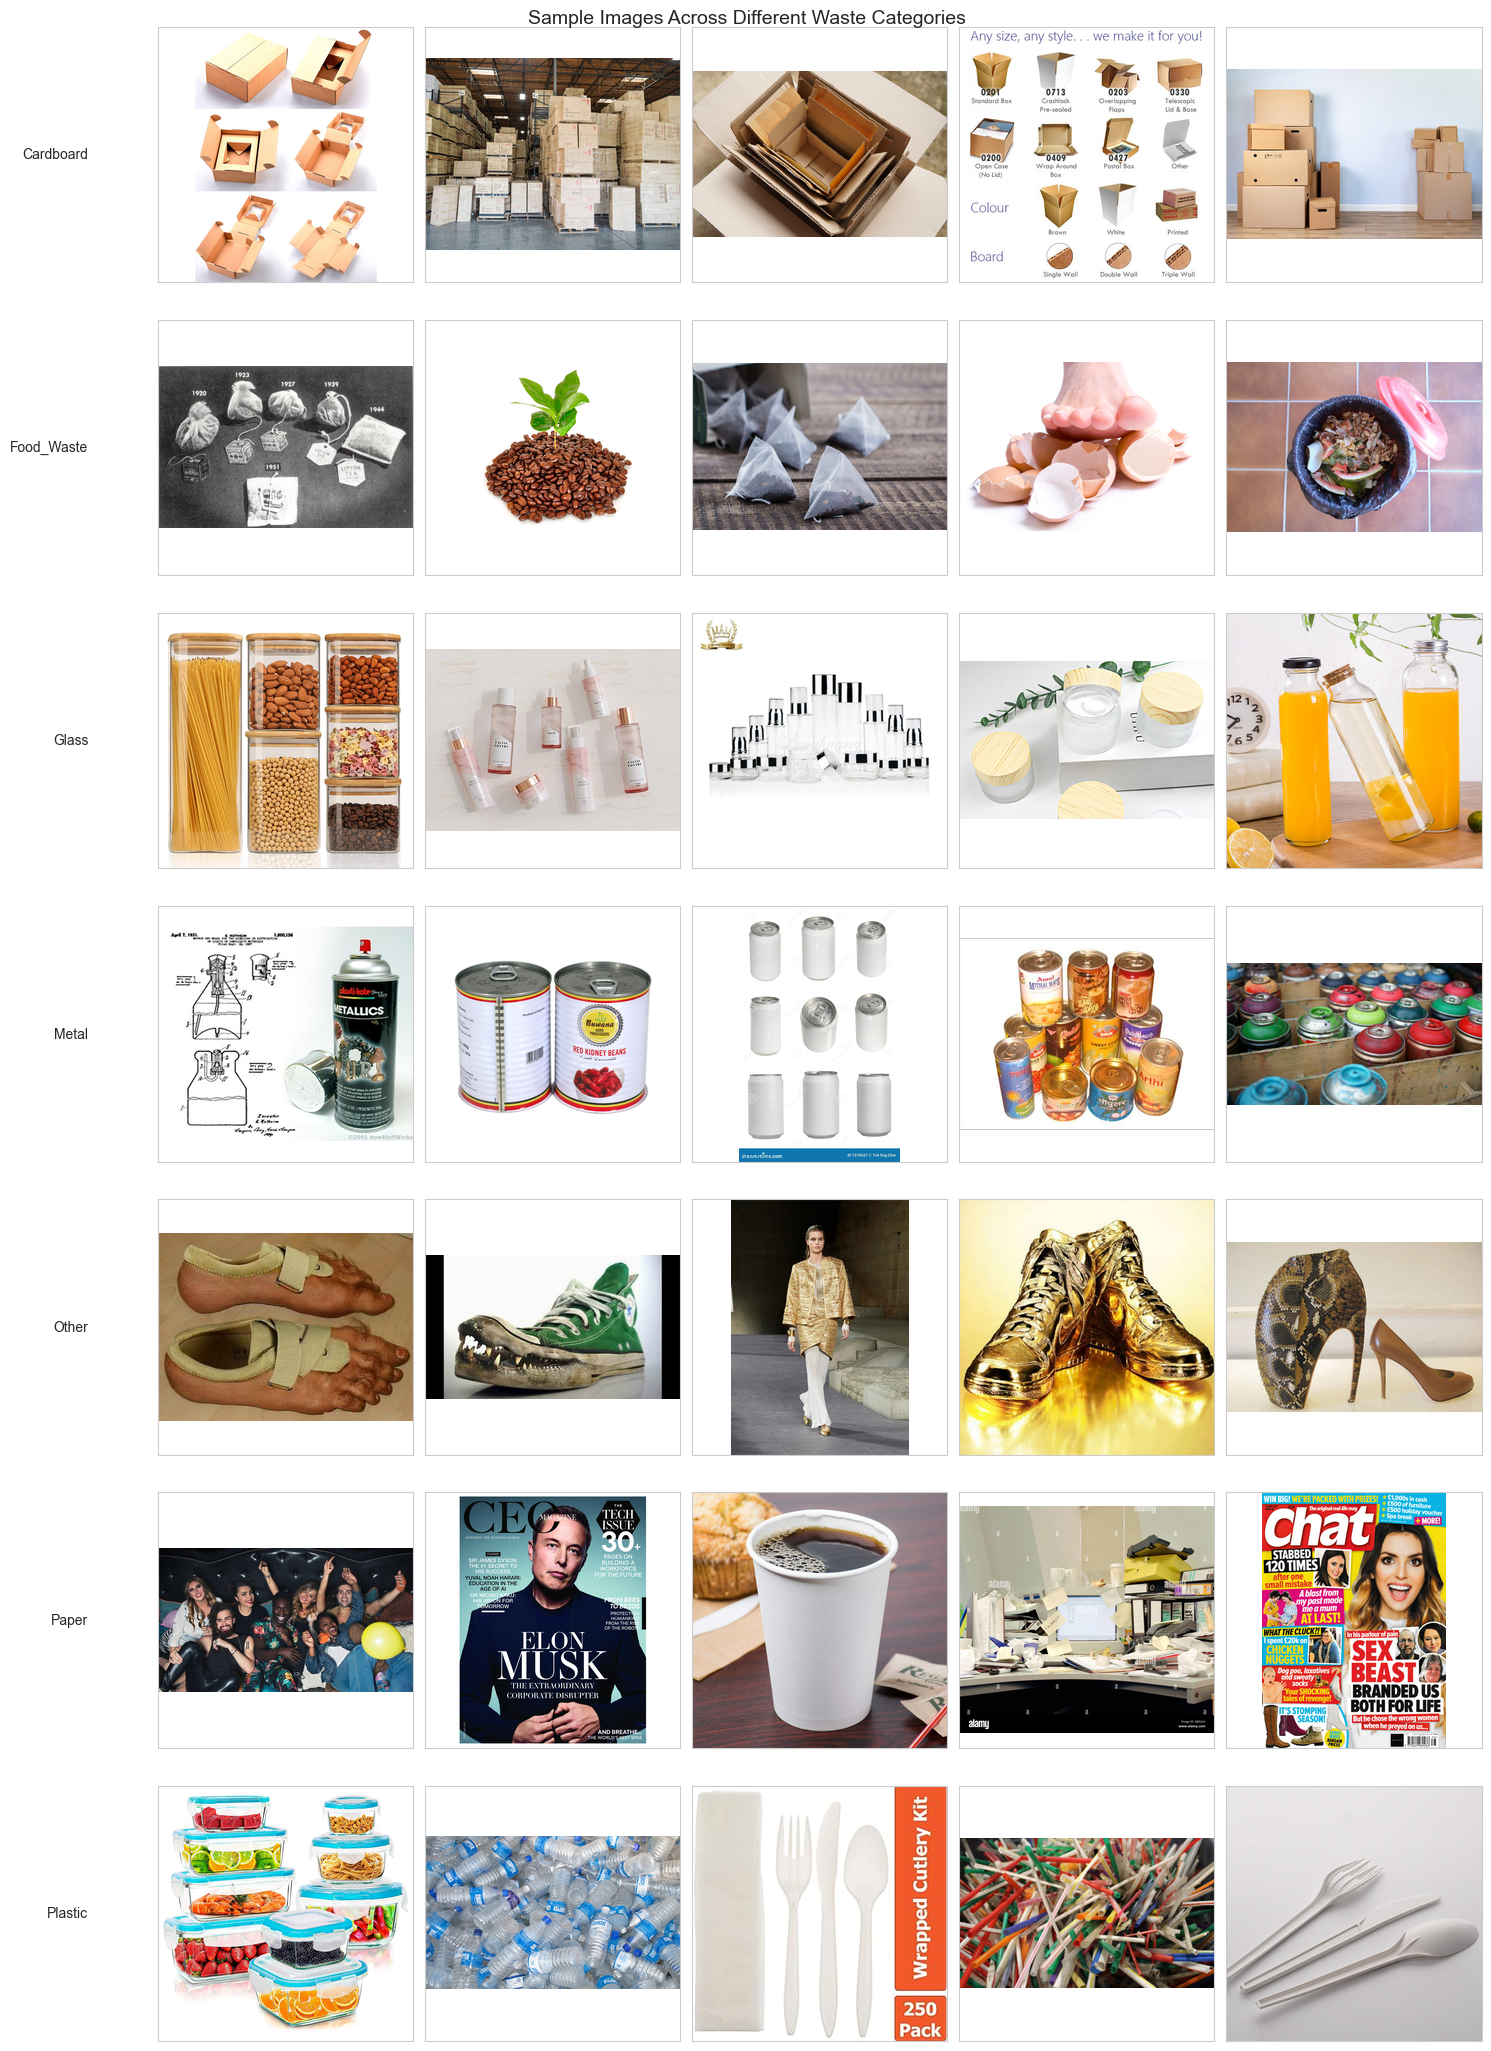

In [8]:
# Visualise Sample Images (across different labels)

def visualize_sample_images(images, labels, samples_per_class=5):
    """
    Args:
        images: Array of images
        labels: Array of corresponding labels
        samples_per_class: Number of samples to show per class
    """

    # Get unique classes
    n_classes = len(unique_classes)
    
    # Create subplot grid
    fig, axes = plt.subplots(n_classes, samples_per_class, 
                            figsize=(15, 3*n_classes))
    fig.suptitle('Sample Images Across Different Waste Categories', 
                 fontsize=14, y=0.98)
    
    # Plot images for each class
    for i, class_name in enumerate(unique_classes):
        class_indices = np.where(labels == class_name)[0]
        selected_indices = np.random.choice(class_indices, 
                                          size=min(samples_per_class, len(class_indices)), 
                                          replace=False)
        
        # Plot each selected image
        for j, idx in enumerate(selected_indices):
            ax = axes[i, j]
            ax.imshow(images[idx])
            if j == 0:
                ax.set_ylabel(class_name, rotation=0, labelpad=50, 
                            ha='right', va='center')
            ax.set_xticks([])
            ax.set_yticks([])
    
    plt.tight_layout()
    plt.show()

# Load images and visualize samples
visualize_sample_images(images, labels)



#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [9]:
# Find the smallest and largest image dimensions from the data set

def find_image_dimensions(images):

    # Get heights and widths of all images
    heights = np.array([img.shape[0] for img in images])
    widths = np.array([img.shape[1] for img in images])
    
    # Find min and max dimensions
    min_height, max_height = np.min(heights), np.max(heights)
    min_width, max_width = np.min(widths), np.max(widths)
    
    print(f"Image dimensions in dataset:")
    print(f"Height range: {min_height} to {max_height} pixels")
    print(f"Width range: {min_width} to {max_width} pixels")
    
    # some additional statistics
    print("\nDetailed statistics:")
    print(f"Mean dimensions: {np.mean(heights):.0f} x {np.mean(widths):.0f}")
    print(f"Median dimensions: {np.median(heights):.0f} x {np.median(widths):.0f}")
    
    # Find and print dimensions of smallest and largest images
    min_area_idx = np.argmin(heights * widths)
    max_area_idx = np.argmax(heights * widths)
    
    print("\nExample images:")
    print(f"Smallest image (by area): {images[min_area_idx].shape}")
    print(f"Largest image (by area): {images[max_area_idx].shape}")
    
    return min_height, min_width, max_height, max_width

# Load images and find dimensions
min_h, min_w, max_h, max_w = find_image_dimensions(images)



Image dimensions in dataset:
Height range: 256 to 256 pixels
Width range: 256 to 256 pixels

Detailed statistics:
Mean dimensions: 256 x 256
Median dimensions: 256 x 256

Example images:
Smallest image (by area): (256, 256, 3)
Largest image (by area): (256, 256, 3)


In [10]:
# Resize the image dimensions
def resize_images(images, target_size=(224, 224)):
    resized_images = []
    
    for img in images:
        # Convert numpy array back to PIL Image
        img_pil = Image.fromarray((img * 255).astype(np.uint8))
        
        # Resize image
        img_resized = img_pil.resize(target_size, Image.Resampling.LANCZOS)
        
        # Convert back to normalized numpy array
        img_array = np.array(img_resized) / 255.0
        resized_images.append(img_array)
    
    return np.array(resized_images)

# Print original shapes
print("Before resizing:")
print(f"Number of images: {len(images)}")
print(f"Sample image shape: {images[0].shape}")

# Resize images
X_resized = resize_images(images)

# Print new shapes
print("\nAfter resizing:")
print(f"Number of images: {len(X_resized)}")
print(f"New image shape: {X_resized[0].shape}")

# Verify consistency
print("\nVerifying consistency:")
print(f"All images same size: {all(img.shape == X_resized[0].shape for img in X_resized)}")



Before resizing:
Number of images: 7625
Sample image shape: (256, 256, 3)

After resizing:
Number of images: 7625
New image shape: (224, 224, 3)

Verifying consistency:
All images same size: True


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [11]:
# Encode the labels suitably

def encode_labels(labels):
    """
    Encode string labels into numeric format
    Input:
        labels: Array of string labels (folder names)
    Returns:
        encoded_labels: Array of numeric labels
        label_encoder: Fitted LabelEncoder object for future inverse transform
    """

    # Initialize and fit the label encoder
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)
    
    # Print mapping for verification
    print("Label Encoding Mapping:")
    for i, label in enumerate(label_encoder.classes_):
        print(f"{label} -> {i}")
    
    return encoded_labels, label_encoder

# Encode the labels
y_encoded, label_encoder = encode_labels(labels)

# Print some statistics
print("\nEncoding Summary:")
print(f"Number of classes: {len(np.unique(y_encoded))}")
print(f"Original labels: {np.unique(labels)}")
print(f"Encoded labels: {np.unique(y_encoded)}")

# Verify we can decode back
print("\nVerification - Decoding back:")
decoded_labels = label_encoder.inverse_transform([0, 1, 2, 3, 4, 5, 6])
print(f"Decoded labels: {decoded_labels}")



Label Encoding Mapping:
Cardboard -> 0
Food_Waste -> 1
Glass -> 2
Metal -> 3
Other -> 4
Paper -> 5
Plastic -> 6

Encoding Summary:
Number of classes: 7
Original labels: ['Cardboard' 'Food_Waste' 'Glass' 'Metal' 'Other' 'Paper' 'Plastic']
Encoded labels: [0 1 2 3 4 5 6]

Verification - Decoding back:
Decoded labels: ['Cardboard' 'Food_Waste' 'Glass' 'Metal' 'Other' 'Paper' 'Plastic']


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [12]:
# Assign specified parts of the dataset to train and validation sets

def split_dataset(X, y, test_size=0.2, random_state=42):
    """
    Split dataset into training and validation sets
    Args:
        X: Image data
        y: Encoded labels
        test_size: Fraction of data to use for validation (default 0.2 = 20%)
        random_state: Random seed for reproducibility
    Returns:
        X_train, X_val: Training and validation images
        y_train, y_val: Training and validation labels
    """

    # Split the dataset
    X_train, X_val, y_train, y_val = train_test_split(
        X, y,
        test_size=test_size,
        random_state=random_state,
        stratify=y
    )
    
    # Print split information
    print("Dataset Split Summary:")
    print(f"Total images: {len(X)}")
    print(f"Training images: {len(X_train)} ({(1-test_size)*100:.0f}%)")
    print(f"Validation images: {len(X_val)} ({test_size*100:.0f}%)")
    
    # Verify class distribution in splits
    print("\nClass distribution:")
    for label in np.unique(y):
        train_count = np.sum(y_train == label)
        val_count = np.sum(y_val == label)
        print(f"\nClass {label}:")
        print(f"  Training: {train_count} images")
        print(f"  Validation: {val_count} images")
    
    return X_train, X_val, y_train, y_val

# Load and preprocess data
#X, y = load_images()
#X_resized = resize_images(X)
#y_encoded, _ = encode_labels(y)

# Split the dataset
X_train, X_val, y_train, y_val = split_dataset(X_resized, y_encoded)

# Verify shapes
print("\nData shapes:")
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")

Dataset Split Summary:
Total images: 7625
Training images: 6100 (80%)
Validation images: 1525 (20%)

Class distribution:

Class 0:
  Training: 432 images
  Validation: 108 images

Class 1:
  Training: 800 images
  Validation: 200 images

Class 2:
  Training: 600 images
  Validation: 150 images

Class 3:
  Training: 800 images
  Validation: 200 images

Class 4:
  Training: 808 images
  Validation: 202 images

Class 5:
  Training: 824 images
  Validation: 206 images

Class 6:
  Training: 1836 images
  Validation: 459 images

Data shapes:
X_train shape: (6100, 224, 224, 3)
X_val shape: (1525, 224, 224, 3)
y_train shape: (6100,)
y_val shape: (1525,)


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [13]:
# Build and compile the model

def build_waste_classification_model(input_shape=(224, 224, 3), num_classes=7):
    """
    Build CNN model for waste classification
    Args:
        input_shape: Shape of input images
        num_classes: Number of waste categories
    Returns:
        model: Compiled CNN model
    """

    
    model = models.Sequential([
        # Input Layer + Normalization
        layers.Input(shape=input_shape),
        layers.Rescaling(1./255),
        
        # First Convolutional Block
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        # Second Convolutional Block
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        # Third Convolutional Block
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        # Flatten and Dense Layers
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    # Compile model
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    # Print model summary
    model.summary()
    
    return model

# Build the model
model = build_waste_classification_model()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,787,335 (98.37 MB)

 Trainable params: 25,786,375 (98.37 MB)

 Non-trainable params: 960 (3.75 KB)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 80s 416ms/step - accuracy: 0.2610 - loss: 2.4613 - val_accuracy: 0.0984 - val_loss: 3.5040
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 78s 409ms/step - accuracy: 0.3884 - loss: 1.7434 - val_accuracy: 0.2184 - val_loss: 2.2455
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 78s 409ms/step - accuracy: 0.4103 - loss: 1.6419 - val_accuracy: 0.2138 - val_loss: 2.5598
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 86s 449ms/step - accuracy: 0.4398 - loss: 1.5162 - val_accuracy: 0.1351 - val_loss: 7.6890
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 86s 451ms/step - accuracy: 0.4695 - loss: 1.4298 - val_accuracy: 0.1364 - val_loss: 6.3800
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 88s 462ms/step - accuracy: 0.4883 - loss: 1.3942 - val_accuracy: 0.3010 - val_loss: 9.4354
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 89s 468ms/step - accuracy: 0.5479 - loss: 1.2372 - val_accuracy: 0.2452 - val_loss: 5.6915
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 91s 476ms/step - accuracy: 0.5781 - loss: 1

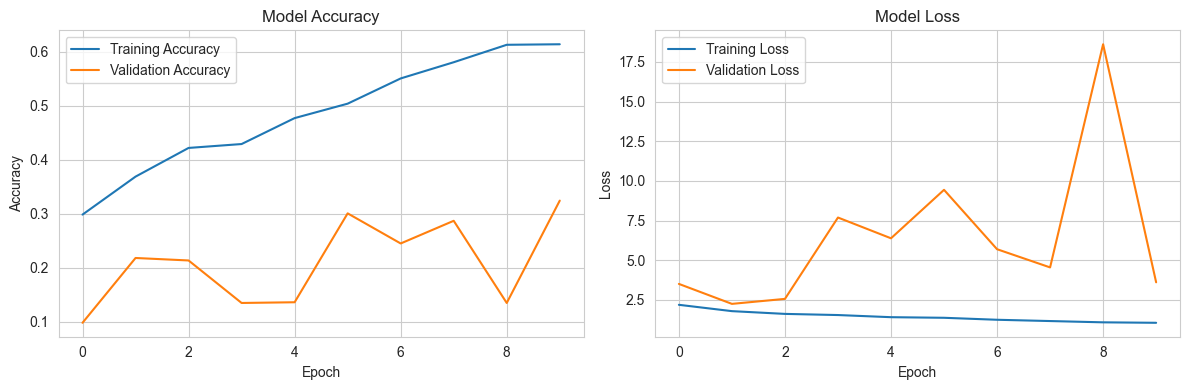

In [14]:
# Training


# Training parameters
epochs = 10
batch_size = 32

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

# Print training and validation accuracy
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Final Validation Accuracy: {val_accuracy * 100:.2f}%")

# Plot training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.3148 - loss: 3.6391

Test Accuracy: 0.3246
Test Loss: 3.6049
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.51      0.38       108
           1       0.00      0.00      0.00       200
           2       1.00      0.01      0.01       150
           3       0.56      0.03      0.05       200
           4       0.21      0.17      0.19       202
           5       0.00      0.00      0.00       206
           6       0.34      0.87      0.49       459

    accuracy                           0.32      1525
   macro avg       0.35      0.23      0.16      1525
weighted avg       0.32      0.32      0.21      1525



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

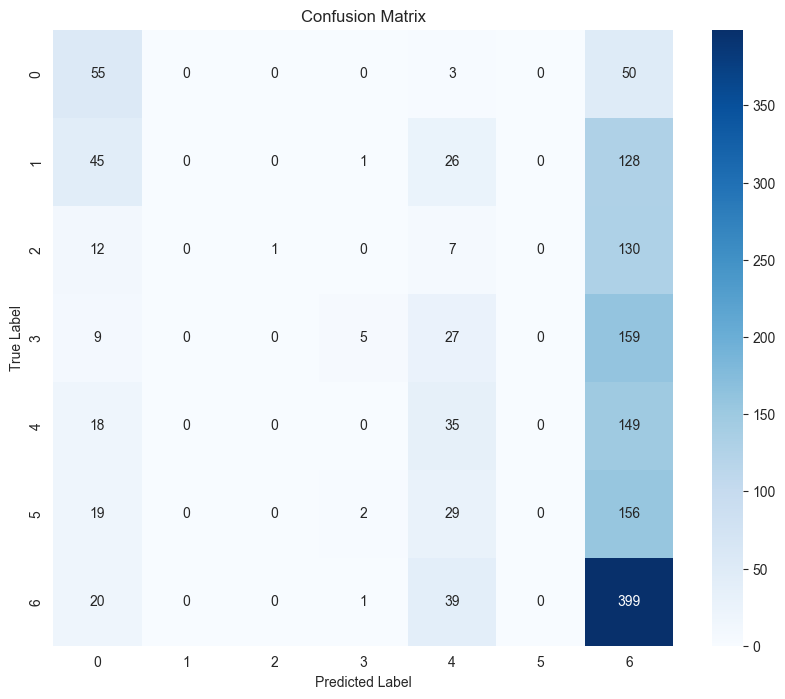


Per-class Accuracy:
Class 0: 0.5093
Class 1: 0.0000
Class 2: 0.0067
Class 3: 0.0250
Class 4: 0.1733
Class 5: 0.0000
Class 6: 0.8693


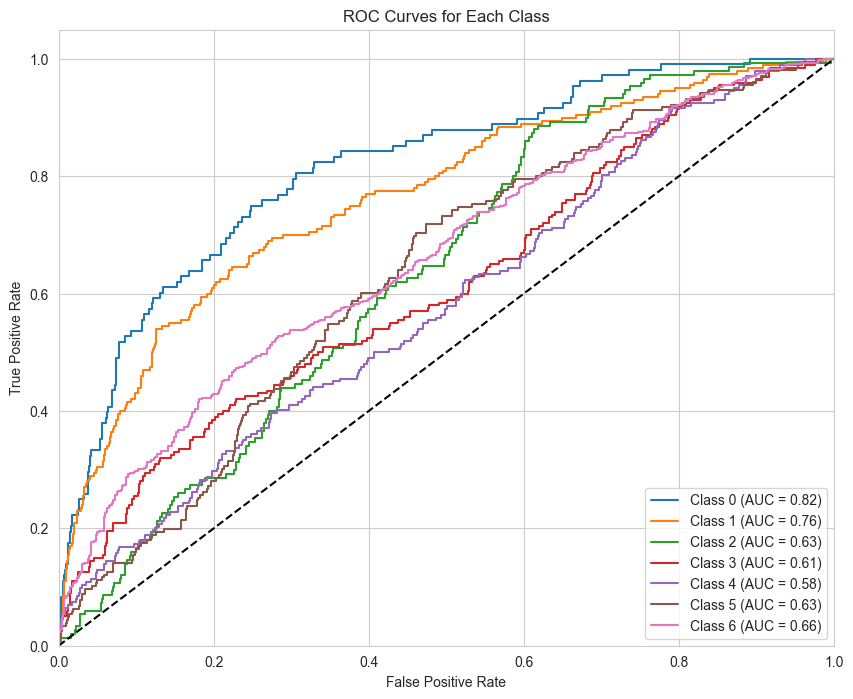

In [15]:
# Evaluate on the test set; display suitable metrics

# Evaluate the model on test set
test_loss, test_accuracy = model.evaluate(X_val, y_val, verbose=1)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Get predictions
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred_classes))

# Confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_val, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Calculate per-class accuracy
class_accuracy = {}
for i in range(len(np.unique(y_val))):
    class_accuracy[i] = np.sum((y_val == i) & (y_pred_classes == i)) / np.sum(y_val == i)

print("\nPer-class Accuracy:")
for class_idx, acc in class_accuracy.items():
    print(f"Class {class_idx}: {acc:.4f}")

# Binarize the output
num_classes = len(np.unique(y_val))
y_test_bin = label_binarize(y_val, classes=range(num_classes))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend(loc="lower right")
plt.show()


## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results

# Outcomes and Insights Gained

## Findings About the Data

### Class Distribution:
- The dataset is highly imbalanced, with some classes (e.g., **Plastic**) having significantly more samples than others (e.g., **Food_Waste** and **Paper**).
- This imbalance likely contributed to poor performance for underrepresented classes.

### Data Quality:
- The dataset contains images of varying quality and complexity, which may have impacted the model's ability to generalize.

### Class Labels:
- Labels were encoded as integers for compatibility with the model. The mapping is as follows:
  - **Cardboard** -> 0
  - **Food_Waste** -> 1
  - **Glass** -> 2
  - **Metal** -> 3
  - **Other** -> 4
  - **Paper** -> 5
  - **Plastic** -> 6

## Model Training Results

### Training and Validation Performance:
- **Final training accuracy**: 61.41%
- **Final validation accuracy**: 32.46%
- The large gap between training and validation accuracy indicates overfitting.

### Test Performance:
- **Test accuracy**: 32.46%
- **Test loss**: 3.6049
- The model struggled to generalize to unseen data, particularly for underrepresented classes.

### Per-Class Performance:
- The model performed well for the **Plastic** class (Class 6) with an accuracy of **86.93%**.
- Performance for other classes, especially **Food_Waste** (Class 1) and **Paper** (Class 5), was poor, with accuracies of **0.00%**.

### ROC-AUC Scores:
- The ROC-AUC scores varied across classes, with the highest being **0.82** for **Cardboard** (Class 0) and the lowest being **0.58** for **Other** (Class 4).

## Insights
- The model's performance is heavily influenced by class imbalance. Classes with more samples (e.g., **Plastic**) achieved higher accuracy, while underrepresented classes performed poorly.
- The high training accuracy and low validation/test accuracy suggest overfitting. Regularization techniques, such as dropout or weight decay, could be further optimized.
- The low precision, recall, and F1-scores for most classes indicate that the model struggles to make meaningful predictions for certain categories.

## Conclusion
- The project highlights the challenges of training a CNN on an imbalanced dataset. While the model performed well for the dominant class (**Plastic**), it failed to generalize for other classes.

### To improve performance:
1. Address class imbalance using techniques like oversampling, undersampling, or class weighting.
2. Collect more data for underrepresented classes.
3. Experiment with different model architectures and hyperparameters.
4. Use data augmentation to increase the diversity of training samples.

- Despite the limitations, the model demonstrates potential for waste material segregation, particularly for well-represented classes. Further improvements could make it a valuable tool for sustainable waste management.